# PART I: The Production System
###### Group 7 - Anne Li Cnossen, Odette Roest, Sydney Koppes and Fleur Giesselbach

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.stats as sts
import statsmodels.graphics.gofplots as sm

## Problem definition: simulation of a tandem line
$I$ multi-server stations with finite buffer slots <br>
$S_i$ number of servers at station $i$ <br>
$C_i$ number of buffer slots at station $i$ <br>
<br>
Arrival process at the fist station follows a $Poisson(\lambda)$ process. <br>
Service times are exponentially distributed with rate $\mu_i$ for all $S_i$ machines in station $i$. <br>
Blocking After Service (BAS) is applied.

### Problem instance

In [3]:
I = 4   

S1 = 1
S2 = 1
S3 = 1
S4 = 1

C1 = 5
C2 = 6
C3 = 6
C4 = 3

lambda_rate = 2.1
mu_1 = 2.9
mu_2 = 2.2
mu_3 = 2.2
mu_4 = 2.8 

### 1. States 
States are given by $$(x_1, x_2, x_3, x_4, \delta_1, \delta_2, \delta_3)$$ where $x_i$ := number of jobs at station $i$, including the server, which is always smaller or equal to $C_i + S_i$ <br>
$\delta_i$ := indicating how many servers are blocked at station $i$, which is always smaller or equal to $S_i$  

### 2. Events
$$\{\alpha, \beta_1, \beta_2, \beta_3, \beta_4\}$$
where $\alpha = \text{arrival of a new job}$ and $\beta_i = \text{service completion of server } i \;\text{with}\; i = 1,2,3,4$ 

### 3. Event lists
The system is completely empty:
$$L((0,0,0,0,0,0,0)) = \{\alpha\}$$

One station is busy, no station is blocked:
$$L((x_1,0,0,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1\} & x_1 \in \{1,2,..,C_1+S_1-1\} \\
    \{\beta_1\} & x_1 = C_1+S_1 \\
\end{cases}
$$
$$L((0,x_2,0,0,0,0,0)) = \{\alpha, \beta_2\} \;\;\;\; x_2 \in \{1,2,..,C_2+S_2\}  $$
$$L((0,0,x_3,0,0,0,0)) = \{\alpha, \beta_3\} \;\;\;\; x_3 \in \{1,2,..,C_3+S_3\}  $$
$$L((0,0,0,x_4,0,0,0)) = \{\alpha, \beta_4\} \;\;\;\; x_4 \in \{1,2,..,C_4+S_4\}  $$

All stations are busy, but no station is blocked:
$$L((x_1,x_2,x_3,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_3, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 \\
    \{\beta_1, \beta_2, \beta_3, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 \\
\end{cases}
$$

At least two stations are busy, but no station is blocked:
$$L((x_1,0,x_3,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_3, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 \\
    \{\beta_1,\beta_3, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 \\
\end{cases}
$$
$$L((x_1,x_2,0,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 \\
    \{\beta_1,\beta_2, \beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 \\
\end{cases}
$$
$$L((x_1,x_2,x_3,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2, \beta_3\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 \\
    \{\beta_1,\beta_2, \beta_3\} &  x_1 = C_1+S_1 \;\text{and}\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 \\
\end{cases}
$$
$$L((x_1,0,0,x_4,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_4\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_4 \in \{1,2,..,C_4+S_4\}\\
    \{\beta_1,\beta_4\} &  x_1 = C_1+S_1 \;\text{and}\; x_4 \in \{1,2,..,C_4+S_4\}\\
\end{cases}
$$
$$L((x_1,0,x_3,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_3\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_3 \in \{1,2,..,C_3+S_3\}\\
    \{\beta_1, \beta_3\} &  x_1 = C_1+S_1 \;\text{and}\; x_3 \in \{1,2,..,C_3+S_3\}\\
\end{cases}
$$
$$L((x_1,x_2,0,0,0,0,0)) = 
\begin{cases}
    \{\alpha, \beta_1, \beta_2\} & x_1 \in \{1,2,..,C_1+S_1-1\} \;\text{and}\; x_2 \in \{1,2,..,C_2+S_2\}\\
    \{\beta_1, \beta_2\} &  x_1 = C_1+S_1 \;\text{and}\; x_2 \in \{1,2,..,C_2+S_2\}\\
\end{cases}
$$
$$L((0,x_2,x_3,x_4,0,0,0)) = \{\alpha, \beta_2, \beta_3, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3,4 $$
$$L((0,0,x_3,x_4,0,0,0)) = \{\alpha, \beta_3, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 3,4 $$
$$L((0,x_2,0,x_4,0,0,0)) = \{\alpha, \beta_2, \beta_4\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,4 $$
$$L((0,x_2,x_3,0,0,0,0)) = \{\alpha, \beta_2, \beta_3\} \;\;\;\; x_i \in \{1,2,..,C_i+S_i\} \;\text{for}\; i = 2,3 $$
The system is completely full and blocked:
$$L((x_1,x_2,x_3,x_4,S_1,S_2,S_3)) = \{\beta_4\} \;\;\;\; x_i = C_i + S_i \;\text{for}\; i = 1,2,3,4  $$
If one or two stations are completely blocked, the event of a completion of a server in the corresponding station is deleted from the event list.  

## CLASSES

In [4]:
class State(object): 
    def __init__(self, _x1 = 0, _x2 = 0, _x3=0, _x4=0, _delta1=0, _delta2=0, _delta3=0):
        self.x1 = _x1
        self.x2 = _x2 
        self.x3 = _x3
        self.x4 = _x4
        self.delta1 = _delta1
        self.delta2 = _delta2
        self.delta3 = _delta3 
    
    def printState(self):
        print('(', self.x1, ', ', self.x2, ', ', self.x3, ', ', self.x4, ', ', self.delta1, ', ', self.delta2, ', ', self.delta3, ')')

class Event(object): 
    def __init__(self, _time = np.inf, _type = ''):
        self.time = _time
        self.type = _type 
    
    def getTime(self): 
        return self.time
    
    def getType(self): 
        return self.type
    
    def printEvent(self): 
        print('(', self.time, ',', self.type, ')', end = ' ')
        

class EventList(object):
    def __init__(self, _elist=[]):
        self.elist = _elist 
    
    def addEvent(self, event): 
        if len(self.elist)==0: 
            self.elist = [event]
        else:
            time_event = event.getTime()
            if time_event > self.elist[-1].getTime():
                self.elist.append(event)
            else: 
                event_start = next(event for event in self.elist if event.getTime() > time_event)
                event_index = self.elist.index(event_start)
                self.elist.insert(event_index, event)
    
    def getFirstEvent(self):
        ''' 
        Gets first item on the list and removes item from the list 
        '''
        first_event = self.elist.pop(0)
        return first_event

    def printEventList(self): 
        for event in self.elist:
            event.printEvent()
        print('')

class CounterSimulation(object):
    def __init__(self, _numServed = 0,_numDeparted = 0): 
        self.numServed = _numServed 
        self.numDeparted = _numDeparted

    def printNumberServed(self):
        print(self.numServed)
        
    def printNumberDeparted(self):
        print(self.numDeparted)
        

## FUNCTIONS

In [5]:
def randomExponential(rate): 
    return -np.log(rnd.random()) / rate 

    
def Arrive(state, counter, eventTime, eventList): 
    if state.x1 == C1 + S1: 
        interArrivalTime = randomExponential(lambda_rate)
        arrivalEvent = Event(eventTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)

    else: 
        counter.numServed += 1 
        state.x1 += 1
    
        non_blocked_server = S1 - state.delta1
        if non_blocked_server > 0: 
            if state.x1 <= S1:
                serviceTime = randomExponential(mu_1)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                eventList.addEvent(departureEvent)
         
        interArrivalTime = randomExponential(lambda_rate)
        arrivalEvent = Event(eventTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)
    
def departure1(state, eventTime, eventList): 
    if state.x2 == C2 + S2: 
        state.delta1 += 1 
    
    else: 
        state.x1 -= 1
        state.x2 += 1
        
        non_blocked_server_2 = S2 - state.delta2
        if non_blocked_server_2 > 0: 
            if state.x2 <= S2: 
                serviceTime = randomExponential(mu_2)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)
    
    
        if state.x1 >= S1:
            serviceTime = randomExponential(mu_1)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
            eventList.addEvent(departureEvent)
        
    
def departure2(state, eventTime, eventList):
    if state.x3 == C3 + S3: 
        state.delta2 += 1 
    
    else: 
        state.x2 -= 1
        state.x3 += 1

        non_blocked_server_3 = S3 - state.delta3
        if non_blocked_server_3 > 0: 
            if state.x3 <= S3: 
                serviceTime = randomExponential(mu_3)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
                eventList.addEvent(departureEvent)

        if state.delta1 > 0: 
            state.delta1 -= 1
            state.x1 -= 1
            state.x2 += 1
            
            if state.x1 >= S1:  
                serviceTime = randomExponential(mu_1)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                eventList.addEvent(departureEvent)
        
        if state.x2 >= S2: 
            serviceTime = randomExponential(mu_2)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
            eventList.addEvent(departureEvent)


def departure3(state, eventTime, eventList):
    if state.x4 == C4 + S4: 
        state.delta3 += 1 
    
    else: 
        state.x3 -= 1
        state.x4 += 1
     
        if state.x4 <= S4: 
            serviceTime = randomExponential(mu_4)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent4')
            eventList.addEvent(departureEvent)
        
      
        if state.delta2 > 0:
            state.delta2 -= 1
            state.x2 -= 1
            state.x3 += 1
            
            if state.x2 >= S2:  
                serviceTime = randomExponential(mu_2)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)
        
            if state.delta1 > 0: 
                state.delta1 -= 1
                state.x1 -= 1
                state.x2 += 1
                
                if state.x1 >= S1: 
                    serviceTime = randomExponential(mu_1)
                    departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                    eventList.addEvent(departureEvent)

        if state.x3 >= S3: 
            serviceTime = randomExponential(mu_3)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
            eventList.addEvent(departureEvent)

def departure4(state, eventTime, eventList,counter):
    counter.numDeparted += 1
    state.x4 -= 1

    if state.delta3 > 0:
        state.delta3 -= 1
        state.x3 -= 1
        state.x4 +=1
        
        if state.x3 >= S3:  
            serviceTime = randomExponential(mu_3)
            departureEvent = Event(eventTime + serviceTime, 'departureEvent3')
            eventList.addEvent(departureEvent)
    
  
        if state.delta2 > 0: 
            state.delta2 -= 1
            state.x2 -=1
            state.x3 +=1
            
            if state.x2 >= S2: 
                serviceTime = randomExponential(mu_2)
                departureEvent = Event(eventTime + serviceTime, 'departureEvent2')
                eventList.addEvent(departureEvent)

    
            if state.delta1 > 0:
                state.delta1 -= 1
                state.x1 -= 1
                state.x2 += 1

                if state.x1 >= S1: 
                    serviceTime = randomExponential(mu_1)
                    departureEvent = Event(eventTime + serviceTime, 'departureEvent1')
                    eventList.addEvent(departureEvent)
        
    if state.x4 >= S4: 
        serviceTime = randomExponential(mu_4)
        departureEvent = Event(eventTime + serviceTime, 'departureEvent4')
        eventList.addEvent(departureEvent) 

## SIMULATION

In [6]:
def simulationRun(numberOfCustomers):
        currentTime = 0
        counter = CounterSimulation()
        state = State()
        eventList = EventList()

    # initialisation of the simulation 
        interArrivalTime = randomExponential(lambda_rate)
        arrivalEvent = Event(currentTime + interArrivalTime, 'arrivalEvent')
        eventList.addEvent(arrivalEvent)
       
        
        while counter.numDeparted < numberOfCustomers:
            event = eventList.getFirstEvent()
            timeEvent = event.getTime()
            typeEvent = event.getType()
        
            #eventList.printEventList()
            #state.printState()
            #print("Type of event processed:",typeEvent,'\n\n')


            if typeEvent == 'arrivalEvent': 
                Arrive(state, counter, timeEvent, eventList)
            elif typeEvent == 'departureEvent1': 
                    departure1(state, timeEvent, eventList)
            elif typeEvent == 'departureEvent2': 
                departure2(state, timeEvent, eventList)
            elif typeEvent == 'departureEvent3': 
                departure3(state, timeEvent, eventList)
            else: 
                departure4(state, timeEvent, eventList,counter)
        
            currentTime = timeEvent
        return(counter.numDeparted/currentTime)

### n\t-plot

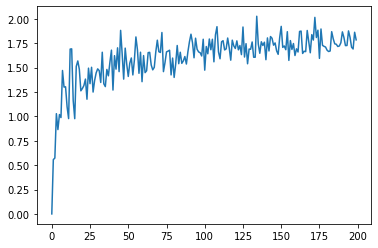

In [7]:
n = 200
y_axis = np.zeros(n)

for i in range(1,n):
    y_axis[i] = simulationRun(i)

plt.plot(y_axis)


In [ ]:
def Simulations(n_simulations,numberOfCustomers):
    results = [simulationRun(numberOfCustomers) for i in range(n_simulations)]
    return results

In [ ]:
Simulations(1000,75)

[1.7005438032237061,
 1.9923065969485392,
 1.6974976277543041,
 1.5923200207366472,
 1.5928433977047498,
 1.7495794131754583,
 1.6430109197809517,
 1.6723994277617713,
 1.6300577617741348,
 1.6951723471275741,
 1.5587049398758521,
 1.7513667596820495,
 1.5535661830090477,
 1.6556309892804775,
 1.6125497905524675,
 1.5379241582565841,
 1.807121318002507,
 1.6482141551255431,
 1.5657518628831684,
 1.7621222216979335,
 1.550734573436706,
 1.5988755825599443,
 1.6799221463548752,
 1.716877679300336,
 1.4861807535981941,
 1.656817714516082,
 1.7881899250495574,
 1.5716095300547506,
 1.5585797346207275,
 1.5741552867009367,
 1.69743449260053,
 1.7202380513758238,
 1.6413581374347073,
 1.5072890796633667,
 1.6977159973620612,
 1.6176370791694232,
 1.891051453513637,
 1.765943802885375,
 1.578892701497652,
 1.678871919819133,
 1.3281644512430195,
 1.5072334085944554,
 1.5910919057282742,
 1.8157443479257471,
 1.7084526206483732,
 1.6055828625589499,
 1.550358419484401,
 1.4764872356877394,
 1.

## STATISTICS

descriptive statistics
DescribeResult(nobs=1000, minmax=(1.354229019477703, 2.069032530278519), mean=1.6914794183126174, variance=0.011746832029855846, skewness=0.08467802441554605, kurtosis=0.06840449605482446)
mean mu, and std sigma: 1.6914794183126174 0.10832859824545867
-----------------------
statistical normality test
Jarque-Bera statistic and p-value: 1.3900269315080696 0.49906772761662177


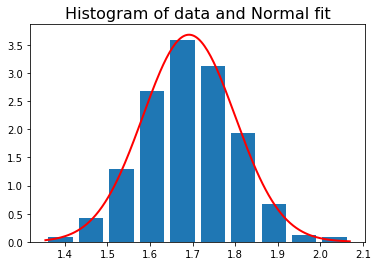

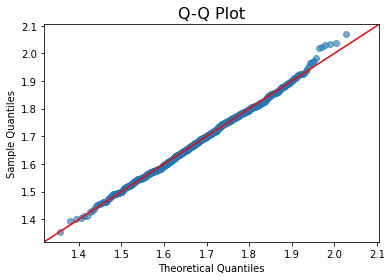

95% CI: 1.6847617825733194 1.6981970540519153


In [ ]:
n = 1000
est_x = Simulations(n,100)
est = np.array(est_x)

print('descriptive statistics')
print(sts.describe(est))

   
[nlc,nsc] = sts.norm.fit(est)
print('mean mu, and std sigma:', nlc,nsc)

print('-----------------------')
print('statistical normality test')  
[t,pv] = sts.jarque_bera(est)
print('Jarque-Bera statistic and p-value:', t,pv)
 
mn = min(est)
mx = max(est)
x = np.linspace(mn,mx,200)
f = sts.norm.pdf(x,loc=nlc,scale=nsc)
plt.hist(est,bins=10,rwidth=0.8,density=True)
plt.plot(x,f,'r',linewidth=2)
plt.title('Histogram of data and Normal fit', fontsize=16)
plt.show()

sm.qqplot(est,sts.norm,loc=nlc,scale=nsc,alpha=0.6,line='45')
plt.title('Q-Q Plot', fontsize=16)
plt.show()

mean = np.mean(est)
s2 = np.var(est, ddof=1)
se = np.sqrt(s2/n)
print("95% CI:", mean-1.96*se, mean+1.96*se)

## Case 2: 

In [ ]:
S1 = 1
S2 = 2
S3 = 3
S4 = 1

descriptive statistics
DescribeResult(nobs=1000, minmax=(1.4501436858391115, 2.4928171328632933), mean=1.9040867974393227, variance=0.024172318682942506, skewness=0.1629063244127294, kurtosis=0.15942433568415515)
mean mu, and std sigma: 1.9040867974393227 0.15539673858951983
-----------------------
statistical normality test
Jarque-Bera statistic and p-value: 5.482083372624829 0.06450311986743729


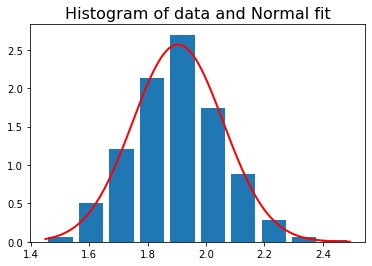

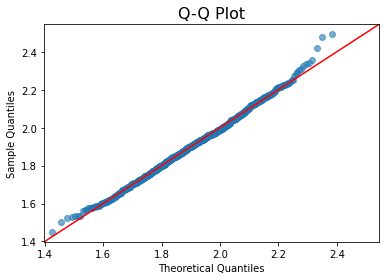

95% CI: 1.8944503883855106 1.9137232064931349


In [ ]:
n = 1000
est_x = Simulations(n,100)
est = np.array(est_x)

print('descriptive statistics')
print(sts.describe(est))

   
[nlc,nsc] = sts.norm.fit(est)
print('mean mu, and std sigma:', nlc,nsc)

print('-----------------------')
print('statistical normality test')  
[t,pv] = sts.jarque_bera(est)
print('Jarque-Bera statistic and p-value:', t,pv)
 
mn = min(est)
mx = max(est)
x = np.linspace(mn,mx,200)
f = sts.norm.pdf(x,loc=nlc,scale=nsc)
plt.hist(est,bins=10,rwidth=0.8,density=True)
plt.plot(x,f,'r',linewidth=2)
plt.title('Histogram of data and Normal fit', fontsize=16)
plt.show()

sm.qqplot(est,sts.norm,loc=nlc,scale=nsc,alpha=0.6,line='45')
plt.title('Q-Q Plot', fontsize=16)
plt.show()

mean = np.mean(est)
s2 = np.var(est, ddof=1)
se = np.sqrt(s2/n)
print("95% CI:", mean-1.96*se, mean+1.96*se)